This is a data set from Lendingclub.com regarding the loans provided to the borrowers.
This is a cleaned data directly availed through Kaggle.com.
The main objective is to classify and predict whether a borrower can payback the loan or not.

Now let's check out the data.

Terminology used:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The data is uploaded directly to the notebook as csv file and we can directly read into the data frame.

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

So the number of loan proposal approved are 7710 and rejected are 1868.

FICO rating is an important parameter in determining the creditworthiness of the borrower.

let us now check out how the FICO score has influenced the credit decision.

Text(0, 0.5, 'Frequency')

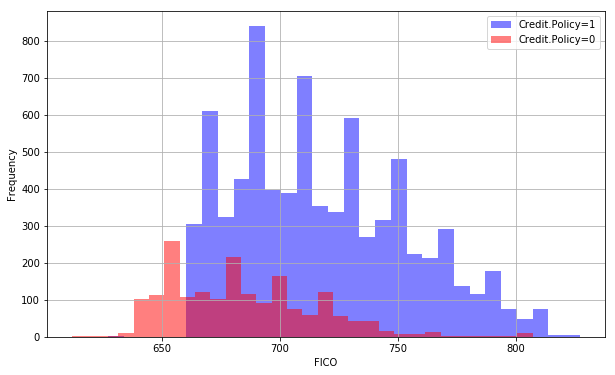

In [8]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')

df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')
plt.ylabel('Frequency')

observations:
1) Approximately with the FICO score<670 the credit decision is negetive.

2) Many approved applications have FICO in the range 670-750 and highest being around 680-690.

3) It can be observed that a significant portion of rejected applications also have a credit score 
   between 670 and 750.

4) So we have to think that FICO score is not only the deciding factor.


Text(0, 0.5, 'Frequency')

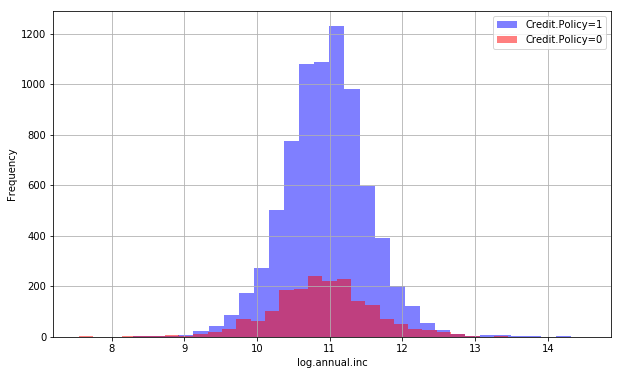

In [9]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['log.annual.inc'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')

df[df['credit.policy']==0]['log.annual.inc'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')

plt.legend()
plt.xlabel('log.annual.inc')
plt.ylabel('Frequency')

observations:
1) In this case it can be observed that income factor is playing a crucial role in credit approval.

2) Majority of proposals who have been granted loan have log of income values between 10 and 12.

3) Although some of the proposals with log annual income more 13 have been rejected their number is      negligible.

4) Compared to number of loan proposals approved for the above income range, the number of proposals
   which are rejected is less.
   

From the above two analysis it can be observed that FICO and income values plays a crucial part in 
credit decision.

Text(0, 0.5, 'Frequency')

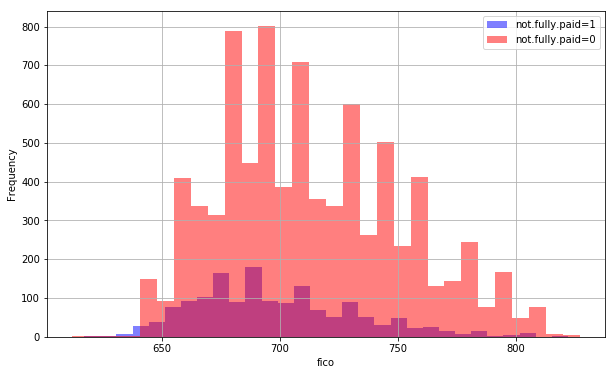

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')

df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')

plt.legend()
plt.xlabel('fico')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

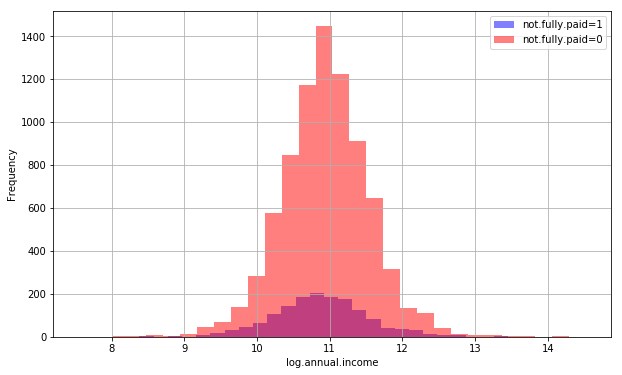

In [11]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['log.annual.inc'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')

df[df['not.fully.paid']==0]['log.annual.inc'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')

plt.legend()
plt.xlabel('log.annual.income')
plt.ylabel('Frequency')

It can be observed from above two plots that majority of credits approved based on Fico and annual income are fully paid.

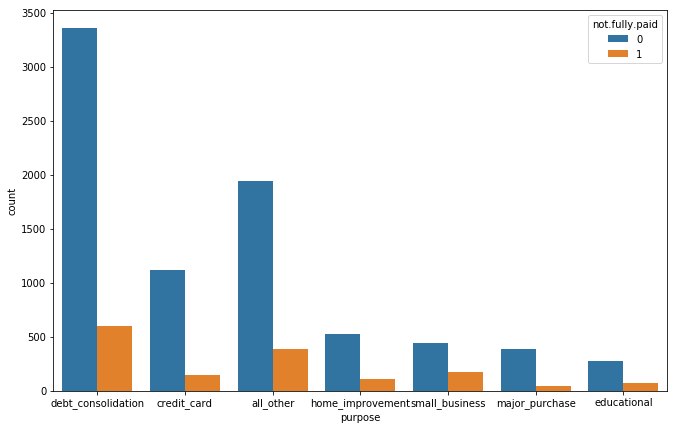

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

observation:
1) Majority of loans in all the different sectors are fully paid.
2) loans wrt debt_consolidation has more number of not fully paid loans than any other sector.

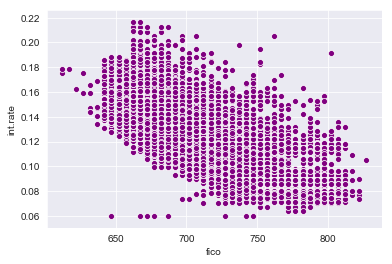

In [13]:
sns.set_style('darkgrid')
sns.scatterplot(x='fico',y='int.rate', data=df,color='purple')

Observation: It can be observed that as FICO score increases interest rates decreases.
This might also be the reason that lot of loans approved based on Fico score are fully paid.

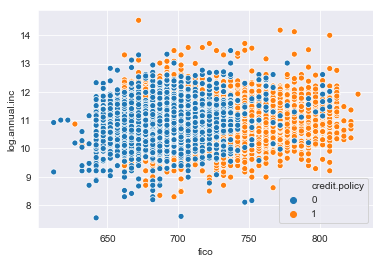

In [14]:
sns.scatterplot(x='fico',y='log.annual.inc',data=df,hue='credit.policy')

observation: It can be observed that much of credit proposals are concentrated  within income values of 9 and 12 and majority of them are rejected. Only proposals with FICO score greater than 730 within the same income range has been approved. So it can be concluded that income value is major deciding factor. 

In [16]:
num_var=df.select_dtypes(include=['float64','int64'])

In [17]:
num_var.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [46]:
num_var.shape

(9578, 13)

In [18]:
corr_mat=num_var.corr()
corr_mat

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [19]:
final=pd.get_dummies(df,columns=['purpose'],drop_first=True)
final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [63]:
X=final.drop('credit.policy',axis=1)
y=final['credit.policy']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtree=DecisionTreeClassifier(class_weight='balanced')

In [67]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
pred=dtree.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       607
           1       0.99      0.99      0.99      2554

   micro avg       0.99      0.99      0.99      3161
   macro avg       0.98      0.98      0.98      3161
weighted avg       0.99      0.99      0.99      3161



In [71]:
print(confusion_matrix(y_test,pred))

[[ 582   25]
 [  19 2535]]


In [72]:
print('accuracy score of decision tree model: ',accuracy_score(y_test,pred))

accuracy score of decision tree model:  0.9860803543182537


Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc=RandomForestClassifier(class_weight='balanced')

In [75]:
rfc.fit(X_train,y_train)

D:\ANACONDA_INSTALLER\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [76]:
predR=rfc.predict(X_test)

In [77]:
print(classification_report(y_test,predR))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       607
           1       0.99      1.00      0.99      2554

   micro avg       0.99      0.99      0.99      3161
   macro avg       0.98      0.97      0.98      3161
weighted avg       0.99      0.99      0.99      3161



In [78]:
print(confusion_matrix(y_test,predR))

[[ 571   36]
 [  11 2543]]


In [79]:
print('accuracy score of Random Forest :',accuracy_score(y_test,predR))

accuracy score of Random Forest : 0.9851312875672256


Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg=LogisticRegression()

In [82]:
log_reg.fit(X_train,y_train)

D:\ANACONDA_INSTALLER\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
predict=log_reg.predict(X_test)

In [84]:
print(confusion_matrix(y_test,predict))

[[ 344  263]
 [  60 2494]]


In [85]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       607
           1       0.90      0.98      0.94      2554

   micro avg       0.90      0.90      0.90      3161
   macro avg       0.88      0.77      0.81      3161
weighted avg       0.89      0.90      0.89      3161



In [86]:
print("accuracy score of logistic model",accuracy_score(y_test,predict))

accuracy score of logistic model 0.8978171464726352


Among the above machine learning models Random Forrest has highest accuracy along with very good precision and recall so the performance of the model is very high.